In [2]:
import pandas as pd

In [7]:
df=pd.read_excel("D:\DATAS\TBC\TBC.xlsx")

In [17]:
df.head()

,Diagnosis Akhir,Ketergantungan,Keluhan Batuk,Keluhan Sesak Nafas,Keluhan Demam,Diagnosa Awal,Riwayat Penyakit Sebelumnya,Jenis Kelamin,Usia
0,0,1,0,0,0,0,0,1,1
1,1,0,1,1,0,1,1,0,1
2,0,2,0,0,0,0,0,1,1
3,1,2,1,1,1,1,2,1,2
4,0,0,0,0,1,0,1,1,1


In [19]:
df.shape           # ukuran data
df.info()          # tipe data, jumlah non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Diagnosis Akhir              223 non-null    int64
 1   Ketergantungan               223 non-null    int64
 2   Keluhan Batuk                223 non-null    int64
 3   Keluhan Sesak Nafas          223 non-null    int64
 4   Keluhan Demam                223 non-null    int64
 5   Diagnosa Awal                223 non-null    int64
 6   Riwayat Penyakit Sebelumnya  223 non-null    int64
 7   Jenis Kelamin                223 non-null    int64
 8   Usia                         223 non-null    int64
dtypes: int64(9)
memory usage: 15.8 KB


In [20]:
df.describe()      # ringkasan statistik numerik
df.nunique()       # jumlah unique value per kolom

Diagnosis Akhir                2
Ketergantungan                 3
Keluhan Batuk                  2
Keluhan Sesak Nafas            2
Keluhan Demam                  2
Diagnosa Awal                  3
Riwayat Penyakit Sebelumnya    3
Jenis Kelamin                  2
Usia                           3
dtype: int64

In [21]:
df.isnull().sum()          # missing values
(df == "").sum()           # cek string kosong
df.duplicated().sum()      # cek duplikasi


56

In [23]:
df['Diagnosa Awal'].value_counts()

Diagnosa Awal
0    105
1     71
2     47
Name: count, dtype: int64

<Axes: >

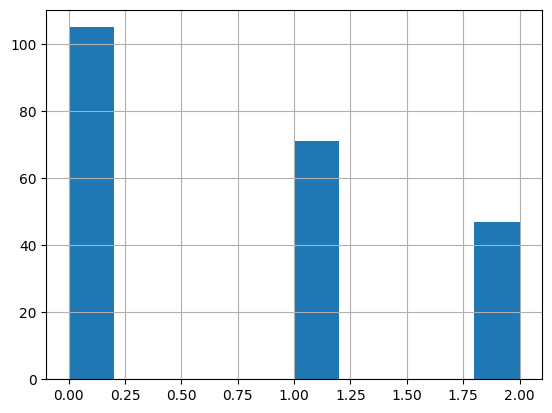

In [24]:
df['Diagnosa Awal'].hist()

<Axes: >

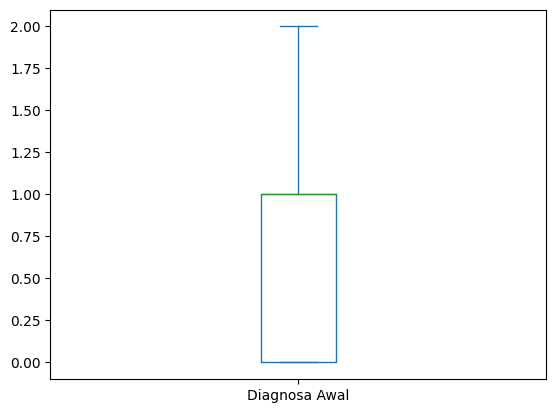

In [25]:
df['Diagnosa Awal'].plot.box()

In [26]:
df.corr(numeric_only=True)   # korelasi antar numerik

,Diagnosis Akhir,Ketergantungan,Keluhan Batuk,Keluhan Sesak Nafas,Keluhan Demam,Diagnosa Awal,Riwayat Penyakit Sebelumnya,Jenis Kelamin,Usia
Diagnosis Akhir,1.000000,-0.005096,0.562209,0.607780,0.612967,0.404079,0.344164,-0.047527,-0.070589
Ketergantungan,-0.005096,1.000000,0.088174,0.052609,0.001741,-0.003250,-0.046093,0.316231,0.089608
Keluhan Batuk,0.562209,0.088174,1.000000,0.335932,0.358336,0.181333,0.205640,-0.029810,-0.041455
Keluhan Sesak Nafas,0.607780,0.052609,0.335932,1.000000,0.464757,0.265485,0.273517,-0.078310,-0.022572
Keluhan Demam,0.612967,0.001741,0.358336,0.464757,1.000000,0.162098,0.255318,-0.076834,-0.095376
Diagnosa Awal,0.404079,-0.003250,0.181333,0.265485,0.162098,1.000000,0.158674,0.036318,0.012190
Riwayat Penyakit Sebelumnya,0.344164,-0.046093,0.205640,0.273517,0.255318,0.158674,1.000000,-0.093299,-0.051991
Jenis Kelamin,-0.047527,0.316231,-0.029810,-0.078310,-0.076834,0.036318,-0.093299,1.000000,0.014891
Usia,-0.070589,0.089608,-0.041455,-0.022572,-0.095376,0.012190,-0.051991,0.014891,1.000000


In [27]:
pd.crosstab(df['Jenis Kelamin'], df['Diagnosa Awal'])   # hubungan 2 kategori

Diagnosa Awal,0,1,2
Jenis Kelamin,,,
0,54,30,23
1,51,41,24


In [30]:
df.groupby('Jenis Kelamin')['Diagnosa Awal'].mean()

Jenis Kelamin
0    0.710280
1    0.767241
Name: Diagnosa Awal, dtype: float64

In [31]:
df.pivot_table(values='Diagnosa Awal', index='Jenis Kelamin', columns='Umur', aggfunc='mean')

KeyError: 'Umur'